# Bayesian Decision Making
PyData Global 2020

If you are reading the interactive slides from binder, press `space` to move to the next slide.

# Note to those running this locally
Remove the %%capture headers to get the image outputs

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

Useful links
https://www.markroepke.me/posts/2019/06/05/tips-for-slideshows-in-jupyter.html

Decisions are everywhere, from deciding what to wear given a weather forecast each day to deciding how much inventory to hold in a multi million dollar supply chain. What is certain is that tools in the PyData ecosystem can help you, or your business, make those decisions with more confidence. Its called decision science in this talk we'll cover what it is and how to use it.

## Outline

The talk will be presented in a way that will not require deep knowledge of any of the technical topics, but just an intuition of basic supply, demand, and multiplication. The intent of the talk is to show how the modern computational tools can be used to make more informed decisions and affect change in common business, or even personal life, scenarios

### Introduction
   * Decisions are everywhere
   * Data is now everywhere is well
   * Data informed decisions not so much

### Decisions from summary analysis
   * This is what most businesses do using Excel or Tableau
        *Nothing wrong with this approach. Its quick and reliable and most folks have the skillset
   * While data focused the approach leads itself to human bias
   *  Leaves information on the table
   * Not very reproducible
   * Doesn't scale to many dimensions
   * We can do better

### Loss/Cost/Reward/Utility Functions

    * Taking an idea from Game Theory different versions of the future will have different goodness
    * This lets us determine how much reward we'll get for different actions

### Quantifying Uncertainty

   * Bayesian Methods let us predict the future, not just summarize the past
   * Not just one future though but all futures
   * Particularly well suited to explaining why its predictions are the way they are

### Optimizing over all possible futures

    * Given a distribution of possible futures and a cost function we can optimize to pick an action that will most likely result in the best outcome
    * Open Source code makes it really easy these days!


Technical Summary of talk
I'll be presenting most likely using Jupyter slides. The analysis will cover a little bit of supply chain theory in math form, and then a whole bunch of simulated supply chain theory in usings scipy.stats.(random) methods, PyMC3 or Stan for parameter estimation, more scipy for optimization methods, matplotlib for plotting. Of course numpy and pandas will likely be in there somewhere as well.

# Who Am I

* Ravin Kumar
* Data Scientist, Supply Chain Engineer, Bayesian Statistician (Depending on who's asking)
* Twitter and github: canyon289

# What I used to do

## Develop supply chain systems for building machinery like Drill Ships
![DrillShip](img/DrillShip.png)

# What I used to do

## Use statistics and python to make make rocket ships

![FalconHeavy](img/FalconHeavy.png)

# What I used to do

## Utilize the PyData Stack to optimize salad manufacturing

![Sweetgreen](img/Sweetgreen.png)

# What I do now

## Core Contributor for PyMC3 and ArviZ

Insert Picture

# Agenda
* Decisions are everywhere
* Lets talk about newsvendors and the difficult decisions they have to make
* How math can help newsvendors
   * Classical Approach
   * (Lack of) extensibility to reality in this approach
   * Modern approach
* What you can do to get started

# Types of decisions

Small stakes, high volume (Ad buys, Minutes until ride share)

Strategic decisions, Outcomes are highly consequential

# Business need to make decisions everyday
Data is optional. Decisions are not

Insert business diagram picture

# Each decision leads to an outcome
Not always the one you want

# What I do now

## Principal Data Scientist and Cofounder at PyMC Labs
Bayesian Statistics and Decision making as a consultancy

Insert Picture

# Data can help
We're going to use a classic operations research example

## Anisha sells newspapers. 

* She buys them wholesale for 5 dollars and sells then for 7 dollars. 
* Newpapers only last one day, they become worthless the next day. 
* Each morning she must make a choice of how many to purchase. 
* If she buys too little she loses an opportunity, if she buys too many she wastes money on unsold papers. 

How many should she purchase in the morning to **maximize her profit**?

# What is her profit?

Before we can maximize something let's talk about how to calculate it. Let's say Anisha buys 42 newspapers, sells 40. 

# Scenario 1. Anisha buys 42 newspapers

In [3]:
newspaper_cost = 5
sales_price = 7

# We c
anishas_inventory = 42
sales = 40

profit = sales*sales_price - newspaper_cost*anishas_inventory

f"Anisha makes ${profit} in profit"

'Anisha makes $70 in profit'

# Scenario 2. Anisha buys 38 newspapers

In [4]:
newspaper_cost = 5
sales_price = 7
anishas_inventory = 38

# Anisha can't sell more news papers than she can buy
sales = 38
profit = sales*sales_price - newspaper_cost*anishas_inventory
f"Anisha makes ${profit} in profit"

'Anisha makes $76 in profit'

# Profit Calculation
If we know

1. Cost of goods sold, acronym COGS (The price Anisha buys for)
2. The end consumers price (The price Anisha sells for)
3. The demand for the day
4. **Anisha's decision**: *The number of newspapers Anisha decides to buy*

we can directly calculate Anisha's profit.  

*Note* In the simplest form of this problem we do not account for lost sales, just the transactions that did occur

## Lets do this for every possible decision value

# Generating a profit curve

In [5]:
%%capture
def profit_calculator(sales, inventory, cogs=5, price=7):
    """Loss function for unmet demand"""
    profit_per_sale = price-cogs
    if sales < inventory:
        leftover_product = inventory-sales
        # I'm unhappy because I have a lot of stuff leftover
        utility = sales*profit_per_sale - leftover_product * cogs
    
        return utility
    
    if sales >= inventory:
        unmet_demand = sales-inventory
        
        # I'm unhappy because I could have sold more
        utility =  inventory*profit_per_sale - unmet_demand*profit_per_sale 
        return utility
    
choices_anisha_could_make = range(100)
profit_with_each_choice = [profit_calculator(40, inv) for inv in choices_anisha_could_make]

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(choices_anisha_could_make, profit_with_each_choice)
ax.axvline(40, linestyle='--', c="gray")
ax.set_title("Profit Curve"); ax.set_xlabel("Number of Newspaper Anisha Bought")
ax.set_ylabel("Profits in Dollars")
plt.savefig("img/ProfitCurve.png")

# Generating a profit curve
We get a graph that looks like this

![ProfitCurve](img/ProfitCurve.png)

![Bayesian Workflow](img/ProfitCurve.png)

# Generating a profit curve (The pythonic way)

In [6]:
def daily_profit(inventory, demand, newvendor_cost=5, customer_price=7):
    """Calculates profit for a given day given inventory and demand"""
    return customer_price*np.min([inventory, demand]) - newvendor_cost*inventory

# Inventory choice and demand
inventory = 30
demand = 50
daily_profit(inventory, demand)

60

# Optimal Decision given fixed demand
If we know demand is 40 newspapers a day, well then the obvious thing to do is buy 40 newspapers in the morning. No data science needed!!

*Insert picture of pydata logo x out*

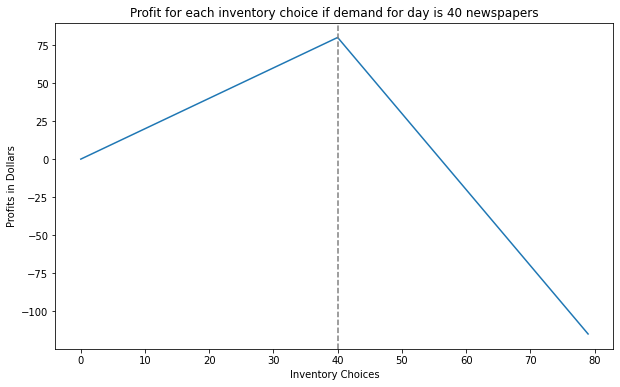

In [8]:
possible_inventory_choices = range(80)
demand = 40
profit_with_each_choice = [daily_profit(choice, demand) for choice in possible_inventory_choices]

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(possible_inventory_choices, profit_with_each_choice)
ax.axvline(40, linestyle='--', c="gray")
ax.set_title("Profit for each inventory choice if demand for day is 40 newspapers"); ax.set_xlabel("Inventory Choices")
ax.set_ylabel("Profits in Dollars");

### Objective function


In [9]:
def objective(inventory: int, demands: iter):
    """Takes an iterable of sales and returns the total profit"""
    # Make reward function negative to turn this into a minimization problem
    return -np.sum([daily_profit(inventory, d) for d in demands])

# Optimal Decision given variable demand?

What if the demand is random though? How do we know how many newspapers to buy?  

Let's  say we have 5 days of demand data

In [10]:
np.random.seed(seed=0)
random_seeds = [1,2,3,4,5]
demand = np.round(stats.norm(40, 20).rvs(15))
demand_seen, demand_unseen = demand[:5], demand[5:]

In [11]:
f"The first five days demand we have seen {demand_seen}"

'The first five days demand we have seen [75. 48. 60. 85. 77.]'

In [12]:
f"The UNSEEN next ten days of demand {demand_unseen}"

'The UNSEEN next ten days of demand [20. 59. 37. 38. 48. 43. 69. 55. 42. 49.]'

## Lets try using mean

In [13]:
mean_demand = demand_seen.mean()
mean_demand

69.0

In [14]:
v = objective(inventory=mean_demand, demands=demand_unseen)
v

230.0

## Lets use critical fractile formula
Assume normal. Plug and chug

In [15]:
fractile_inventory = demand_seen.mean()+demand_seen.std()*stats.norm.ppf((7-5)/7)

v = objective(inventory=fractile_inventory, demands=demand_unseen)
v

-92.48377690939299

In [16]:
demand_seen.mean()

69.0

In [17]:
fractile_inventory

61.5003772811769

In [18]:
v = objective(inventory=fractile_inventory, demands=demand_unseen)
v

-92.48377690939299

### Let's use bayes

In [19]:
import pymc3 as pm

with pm.Model() as newsvendor:
    sd = pm.HalfStudentT("sd", sigma=10, nu=20)
    mu = pm.Normal("mu", demand_seen.mean(), 20)
    sales = pm.Normal("sales", mu=mu, sd=sd, observed = demand_seen)

    trace = pm.sample(tune=5000, chains=2)
    posterior_predictive = pm.sample_posterior_predictive(trace, progressbar=False)
    bayesian_demand_estimate = np.random.choice(posterior_predictive["sales"].flatten(), size=1000)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, sd]


Sampling 2 chains for 5_000 tune and 1_000 draw iterations (10_000 + 2_000 draws total) took 35 seconds.
The acceptance probability does not match the target. It is 0.7109046819125558, but should be close to 0.8. Try to increase the number of tuning steps.


<AxesSubplot:>

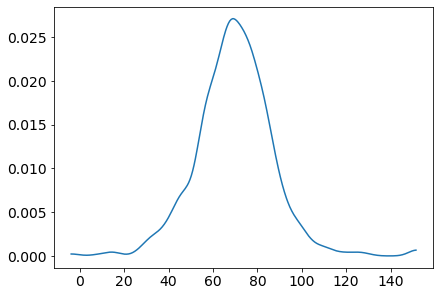

In [20]:
import arviz as az
az.plot_dist(bayesian_demand_estimate)

In [21]:
from scipy import optimize
opt_stoch = optimize.minimize_scalar(objective, bounds=(0, np.inf), args=(bayesian_demand_estimate,))

In [22]:
opt_stoch.x

61.44936348877456

In [23]:
objective(opt_stoch.x, demand_unseen)

-94.67736998269419

## Many assumptions make for easy solutions
If we assume
* Stationary Distribution
* Gaussian distribution of demand
    * We have enough data to correctly estimate mean and standard deviation

Our first two models 

## Bayesian Models can be more flexible
What if
* we have some prior experience?
* demand is not stationary but changes over time?
* we have sales from similiar regions?
* we want to assume any distribution, not just Normal?
* There are latent factors of demand we'd like to estimate, such as breaking news effect?

Bayesian models have the capability to address all these cases

Add picture of pen and paper, calculator, python
* As our tools get more sophisticated we new opportunities open or we can use more complex methods with ease